In [1]:
from astropy.io import fits
from astropy.table import Table, Column, hstack
from astropy.wcs import WCS
from scipy.optimize import curve_fit
from astropy.cosmology import FlatLambdaCDM

import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import astropy.units as u

%matplotlib inline

### Format

In [2]:
plt.rcParams['figure.figsize'] = (12, 7)
plt.rcParams['font.size'] = 14
#Improve plots resolution
plt.rcParams['figure.dpi'] = 200
plt.rcParams['savefig.dpi'] = 200

### Files

In [3]:
image_h = "MIGHTEE_Continuum_DR1_CDFS-DEEP_5p5arcsec_I_v1-Copy1.fits"
image_l = "MIGHTEE_Continuum_DR1_CDFS-DEEP_7p3arcsec_I_v1-Copy1.fits"
#Candels catalogs
candels_cat = "hlsp_candels_hst_wfc3_goodss_santini_v1_physpar-cat_WithRadio.fits"

In [4]:
def read_candels(catalog):
    t_r = Table.read(catalog)
    return (t_r)

#Gets data from desire column and returns it in numpy format
def get_data(catalogue,colum):
    hdulist = fits.open(catalogue, memmap = True)
    table_data = hdulist[1].data[colum]
    np_data = np.array(table_data)
    
    hdulist.close()
    return(np_data)

In [5]:
#K
"""candels_cat_tmp =Table.read(candels_cat)
candels_cat_tmp.colnames"""

'candels_cat_tmp =Table.read(candels_cat)\ncandels_cat_tmp.colnames'

#### DATA

In [6]:
tab_candels = read_candels(candels_cat)

In [7]:
#LUMINOSITY DATA

#Luminosity
L_h = get_data(candels_cat,"L_h")
L_l = get_data(candels_cat,"L_l")
#SFR
sfr_list = [("SFR_2a_tau","red","Model SFR 2a_tau"),("SFR_6a_tau","b","Model SFR 6a_tau"),
            ("SFR_11a_tau","g","Model SFR 11a_tau"),("SFR_13a_tau","cyan","Model SFR 13a_tau"),
            ("SFR_14a_tau","magenta","Model SFR 14a_tau"),("SFR_6a_tau^NEB","brown","Model SFR 6a_tau^NEB")]

<function matplotlib.pyplot.show(close=None, block=None)>

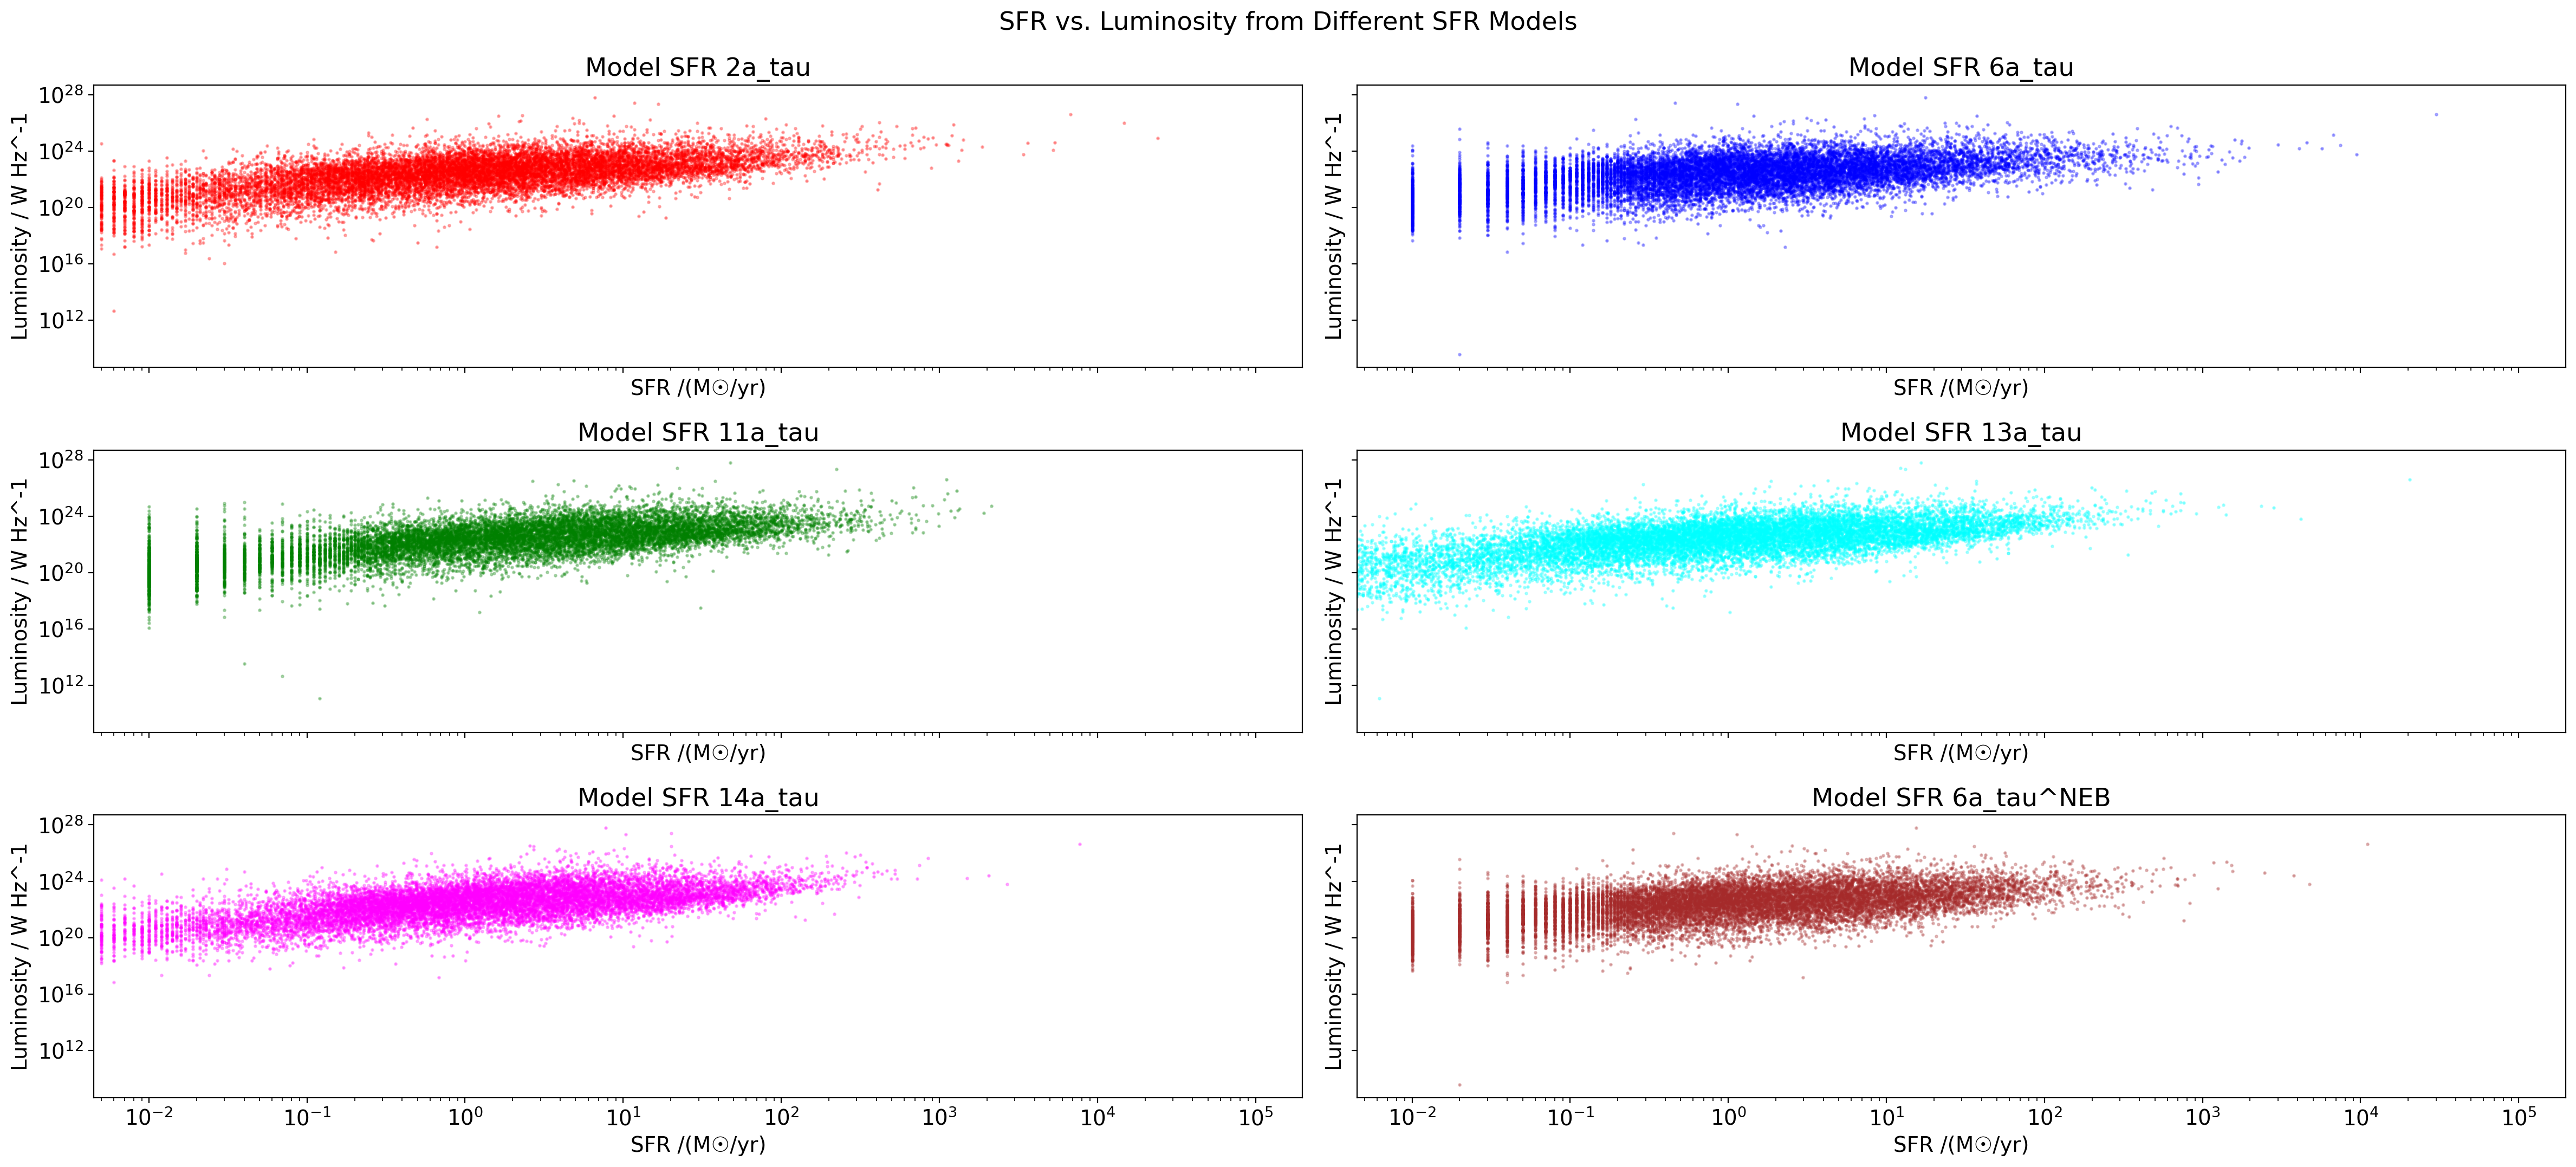

In [ ]:
#PLOT DIFFERENT L_VS_SFR PLOTS WITH DIFFERENT SFR MODELS
plt.rcParams["figure.figsize"] = (24,11)

fig,axs = plt.subplots(3,2,sharey=True, sharex=True)

#loop for each subplot to plot their own sfr and color from the sfr_list
for i, (sfr,color,subtitle) in enumerate(sfr_list):
    sfr_data = get_data(candels_cat,sfr)
    
    #determine subplot row
    row = i // 2
    #determine col row
    col = i % 2
    
    #plot
    axs[row,col].scatter(sfr_data,L_h, s=2, c=color, alpha= 0.3)
    axs[row,col].set_yscale("log")
    axs[row,col].set_xscale("log")
    axs[row,col].set_xlabel("SFR /(M☉/yr)")
    axs[row,col].set_ylabel("Luminosity / W Hz^-1")
    axs[row,col].set_title(subtitle)
    
fig.suptitle("SFR vs. Luminosity from Different SFR Models")
fig.tight_layout()
    
plt.savefig("L_vs_SFR")
plt.show

### Curve fitting

In [9]:
#SFR data
SFR_2atau = get_data(candels_cat,"SFR_2a_tau")

In [10]:
#CURVE FITTING
#log to be fitted
def log_model(logX,A,B):
    return A*logX+B

In [11]:
#Luminosity data
Y_data = get_data(candels_cat,"L_h")
#SFR data
X_data = SFR_2atau

In [18]:
print(np.min(Y_data[(Y_data>0) & (X_data>0)]), np.max(Y_data[(Y_data>0) & (X_data>0)]))



120637384123.53323 6.070504677405304e+27


In [19]:
#curve fit
#Mask values that are -99.0 and 0.0
params,covarience = curve_fit(log_model,np.log10(X_data[(Y_data>0) & (X_data>0)]), np.log10(Y_data[(Y_data>0) & (X_data>0)]))
A_fit,B_fit = params
print(A_fit, B_fit)

0.7880763985322732 22.304603444303417


In [20]:
print(np.min(X_data), np.max(X_data))

print(X_data)


-99.0 89130.0
[ 6.918  3.548  0.204 ... 10.     1.905  3.162]


In [ ]:
#Data points
fig = plt.figure()
#ax.scatter(SFR_2atau, L_h, s=2, c="tab:cyan",alpha=0.3, label= "High resolution image")
plt.scatter(X_data[(Y_data>0) & (X_data>0)], Y_data[(Y_data>0) & (X_data>0)], s=2, c="tab:cyan",alpha=0.3, rasterized=True)
plt.loglog()
plt.show()



In [ ]:
#Plot data and fit

#Data points
fig,ax = plt.subplots()
#ax.scatter(SFR_2atau, L_h, s=2, c="tab:cyan",alpha=0.3, label= "High resolution image")
ax.scatter(X_data[(Y_data>0) & (X_data>0)], Y_data[(Y_data>0) & (X_data>0)], s=2, c="tab:cyan",alpha=0.3, rasterized=True)

ax.set_yscale("log")
ax.set_xscale("log")
ax.set_ylabel("Luminosity / W Hz^-1")
ax.set_xlabel("SFR /(M☉/yr)")
fig.suptitle("SFR_2atau Vs Luminosity")

#Data fit
X_plot = np.logspace(-4, 4, 81)
log_Y_fit = log_model(np.log10(X_plot), A_fit, B_fit)
ax.plot(X_plot,np.power(10., log_Y_fit),color = "red",label="Fitted Curve")
ax.legend(loc="lower right")
fig.tight_layout()

In [54]:
#Get fits for all the models
#Luminosity
L_h = get_data(candels_cat,"L_h")
#SFR
sfr_list = [("SFR_2a_tau","red","Model SFR 2a_tau"),("SFR_6a_tau","b","Model SFR 6a_tau"),
            ("SFR_11a_tau","g","Model SFR 11a_tau"),("SFR_13a_tau","cyan","Model SFR 13a_tau"),
            ("SFR_14a_tau","magenta","Model SFR 14a_tau"),("SFR_6a_tau^NEB","brown","Model SFR 6a_tau^NEB")]

In [55]:
#CURVE FITTING
#log to be fitted
def log_model(logX,A,B):
    return A*logX+B

In [ ]:
#PLOT MODELS WITH THEIR FIT LINES
plt.rcParams["figure.figsize"] = (24,11)

fig,axs = plt.subplots(3,2,sharey=True, sharex=True)


#loop for each subplot to plot their own sfr and color from the sfr_list
for i, (sfr,color,subtitle) in enumerate(sfr_list):
    X_data = get_data(candels_cat,sfr)
    L_h = Y_data

    #determine subplot row
    row = i // 2
    #determine col row
    col = i % 2
    
    #Plot
    axs[row,col].scatter(X_data[(Y_data>0) & (X_data>0)], Y_data[(Y_data>0) & (X_data>0)],s=2,color=color,alpha = 0.3)
    axs[row,col].set_yscale("log")
    axs[row,col].set_xscale("log")
    axs[row,col].set_xlabel("SFR /(M☉/yr)")
    axs[row,col].set_ylabel("Luminosity / W Hz^-1")
    axs[row,col].set_title(subtitle)

    
    #Data fit
    params,covarience = curve_fit(log_model,np.log10(X_data[(Y_data>0) & (X_data>0)]), np.log10(Y_data[(Y_data>0) & (X_data>0)]))
    A_fit,B_fit = params
    
    X_plot = np.logspace(-4,4,81)
    log_Y_fit = log_model(np.log10(X_plot),A_fit,B_fit)
    axs[row,col].plot(X_plot,np.power(10., log_Y_fit),color = "black",label="Fitted Curve")
    
    #Add text box to subplots with fit parameter
    text_box = f"Fit Parameter A: {round(A_fit,3)}\nFit Parameter B: {round(B_fit,3)}"
    axs[row, col].text(0.75, 0.3, text_box, transform=axs[row, col].transAxes,
                       verticalalignment='top', bbox=dict(facecolor='white', alpha=0.8))

fig.suptitle("SFR vs. Luminosity from Different SFR Models")
fig.tight_layout()
plt.show()
#plt.savefig("SFR_Vs_Lum_modelsfits.png")

In [ ]:
#PLOT FIT LINES OF EACH MODEL
plt.rcParams["figure.figsize"] = (24,11)

fig,axs = plt.subplots(3,2,sharey=True, sharex=True)


#loop for each subplot to plot their own sfr and color from the sfr_list
for i, (sfr,color,subtitle) in enumerate(sfr_list):
    X_data = get_data(candels_cat,sfr)
    L_h = Y_data

    #determine subplot row
    row = i // 2
    #determine col row
    col = i % 2
    
    #Plot
    #axs[row,col].scatter(X_data[(Y_data>0) & (X_data>0)], Y_data[(Y_data>0) & (X_data>0)],s=2,color=color,alpha = 0.3)
    axs[row,col].set_yscale("log")
    axs[row,col].set_xscale("log")
    axs[row,col].set_xlabel("SFR /(M☉/yr)")
    axs[row,col].set_ylabel("Luminosity / W Hz^-1")
    axs[row,col].set_title(subtitle)

    
    #Data fit
    #Curve fit parameters
    params,covarience = curve_fit(log_model,np.log10(X_data[(Y_data>0) & (X_data>0)]), np.log10(Y_data[(Y_data>0) & (X_data>0)]))
    A_fit,B_fit = params
    
    #Plot fit with corresponding colors
    X_plot = np.logspace(-4,4,81)
    log_Y_fit = log_model(np.log10(X_plot),A_fit,B_fit)
    axs[row,col].plot(X_plot,np.power(10., log_Y_fit),color=color,label="Fitted Curve")

    
    #Add text box to subplots with fit parameter
    text_box = f"Fit Parameter A: {round(A_fit,3)}\nFit Parameter B: {round(B_fit,3)}"
    axs[row, col].text(0.05, 0.90, text_box, transform=axs[row, col].transAxes,
                       verticalalignment='top', bbox=dict(facecolor='white', alpha=0.8))


fig.suptitle("SFR vs. Luminosity from Different SFR Models")
fig.tight_layout()
plt.show()
#plt.savefig("SFR_Vs_Lum_fits.png")

In [ ]:
#PLOT FIT LINES OF EACH MODEL
plt.rcParams["figure.figsize"] = (15,11)
fig,axs = plt.subplots()

#List to store information for the legend
legend_lines = []

#loop for each subplot to plot their own sfr and color from the sfr_list
for i, (sfr,color,subtitle) in enumerate(sfr_list):
    X_data = get_data(candels_cat,sfr)
    L_h = Y_data

    #Data fit
    #Curve fit parameters
    params,covarience = curve_fit(log_model,np.log10(X_data[(Y_data>0) & (X_data>0)]), np.log10(Y_data[(Y_data>0) & (X_data>0)]))
    A_fit,B_fit = params
    
    #Plot fit with corresponding colors
    X_plot = np.logspace(-4,4,81)
    log_Y_fit = log_model(np.log10(X_plot),A_fit,B_fit)
    
    fit_line = axs.plot(X_plot,np.power(10., log_Y_fit),color=color,label = subtitle,linewidth=1)

    #Plot
    axs.set_yscale("log")
    axs.set_xscale("log")
    axs.set_xlabel("SFR /(M☉/yr)")
    axs.set_ylabel("Luminosity / W Hz^-1")
    
fig.suptitle("SFR vs. Luminosity from Different SFR Models")
axs.legend()
fig.tight_layout()

plt.show()
#plt.savefig("SFR_Vs_Lum_Allfits.png")